In [14]:
import csv
import numpy as np
import os
import sys
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "retina"
plt.rcParams.update({'font.size': 12, 'figure.max_open_warning': 0})
plt.rc("figure", dpi=100)
plt.style.use("seaborn-whitegrid")

In [2]:
def get_data(filename):
    with open(filename) as training_file:
      # Your code starts here
        labels, images = [], []
        for line in training_file.readlines()[1:]:
            line = line.strip().split(',')
            labels.append(line[0])
            images.append(np.array(line[1:]).astype(int).reshape(28, -1))

        labels = np.array(labels).astype(int)
        images = np.array(images)
      # Your code ends here
    return images, labels

path_sign_mnist_train = f"{os.getcwd()}/../Data/MNIST/mnist_train.csv"
path_sign_mnist_test = f"{os.getcwd()}/../Data/MNIST/mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

# Check data
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [3]:
# Add another dimension to the data
training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True)

train_generator = train_datagen.flow(training_images, training_labels)
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow(testing_images, testing_labels)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [17]:
# Define a Callback class that stops training once accuracy reaches 97.0%
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.97):
            print("\nReached 97.0% accuracy so cancelling training!")
            self.model.stop_training = True


In [ ]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3),
                           activation='relu',
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(25, activation='softmax')
])

# Compile Model.
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the Model
callbacks = myCallback()
history = model.fit(
    train_generator, 
    epochs=100,
    callbacks=[callbacks],
    validation_data=validation_generator) 

model.evaluate(testing_images, testing_labels, verbose=0)

Epoch 1/100
858/858 [==============================] - 5s 6ms/step - loss: 2.7646 - accuracy: 0.1461 - val_loss: 2.0568 - val_accuracy: 0.3055
Epoch 2/100
858/858 [==============================] - 5s 6ms/step - loss: 1.9587 - accuracy: 0.3626 - val_loss: 1.2313 - val_accuracy: 0.5955
Epoch 3/100
858/858 [==============================] - 5s 6ms/step - loss: 1.5399 - accuracy: 0.4869 - val_loss: 0.9431 - val_accuracy: 0.6616
Epoch 4/100
858/858 [==============================] - 5s 6ms/step - loss: 1.3026 - accuracy: 0.5624 - val_loss: 0.7346 - val_accuracy: 0.7338
Epoch 5/100
858/858 [==============================] - 5s 6ms/step - loss: 1.1219 - accuracy: 0.6209 - val_loss: 0.7183 - val_accuracy: 0.7355
Epoch 6/100
858/858 [==============================] - 5s 6ms/step - loss: 1.0057 - accuracy: 0.6606 - val_loss: 0.5456 - val_accuracy: 0.8134
Epoch 7/100
858/858 [==============================] - 5s 6ms/step - loss: 0.9002 - accuracy: 0.6963 - val_loss: 0.4737 - val_accuracy: 0.8284

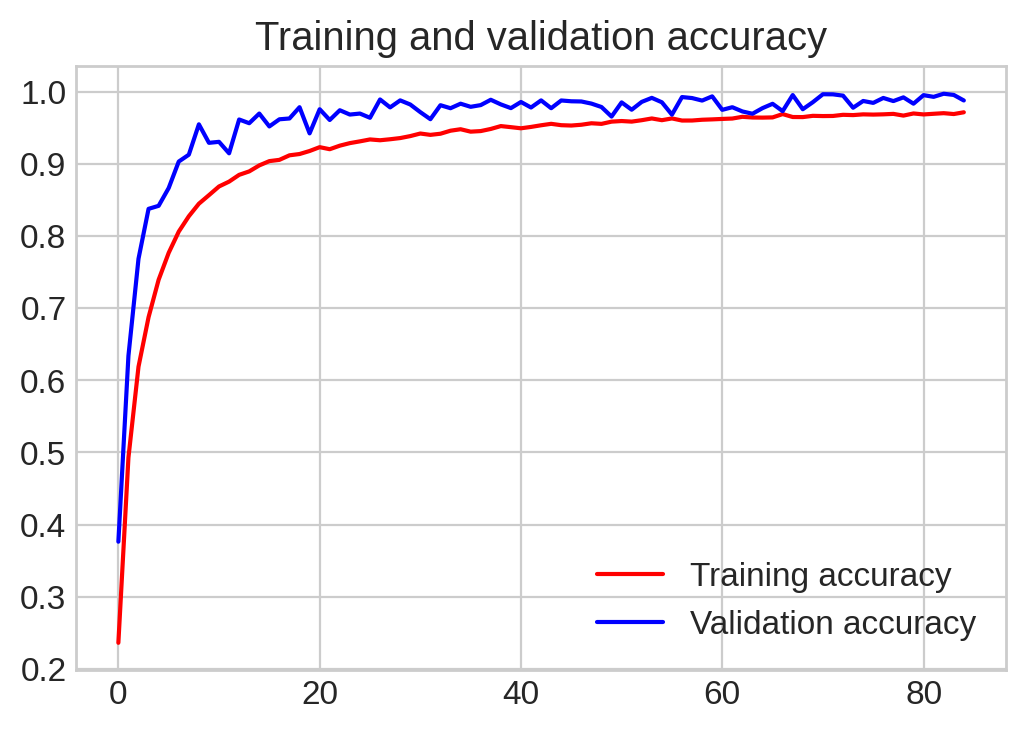

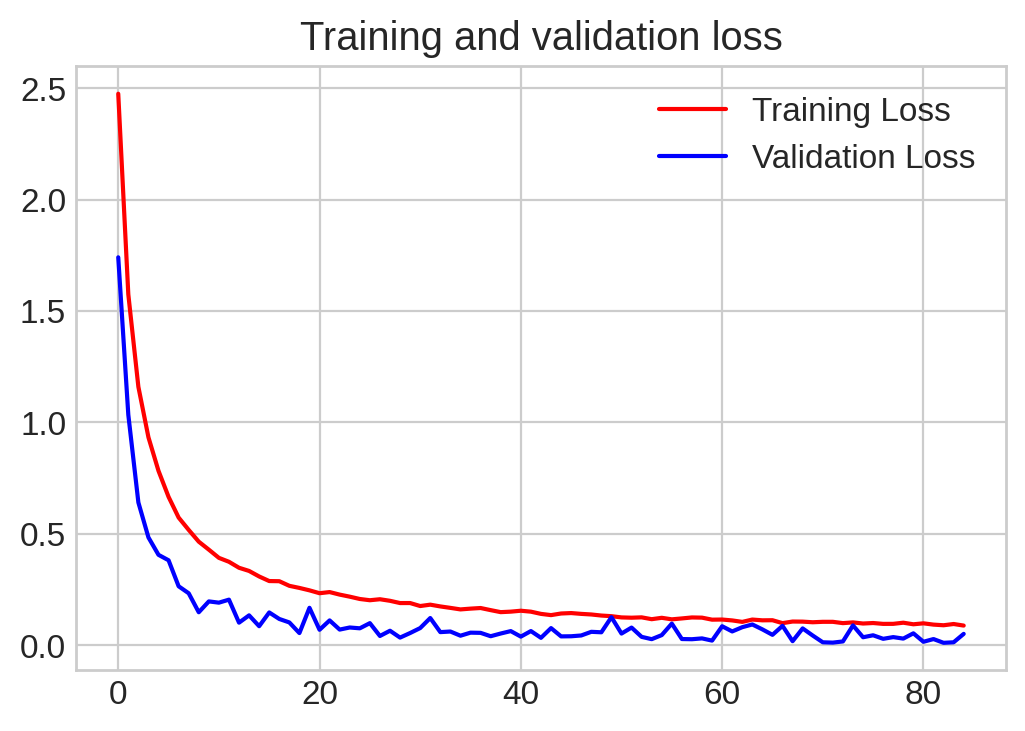

In [20]:
# Plot the chart for accuracy and loss on both training and validation

acc = history.history['accuracy']# Your Code Here
val_acc = history.history['val_accuracy']# Your Code Here
loss = history.history['loss']# Your Code Here
val_loss = history.history['val_loss'] # Your Code Here

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()